<a href="https://colab.research.google.com/github/shreyadeep01/DATA240_Project/blob/initial-colab-change-files-_sh/DATA240_project_w_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Load datasets  Google drivesfrom

In [2]:
merged_raw_data_url = 'https://drive.google.com/file/d/1WDfh8HLYOtUNuhRZqKCScd1qb4l9sqyj/view?usp=sharing'
merged_raw_data_url = 'https://drive.google.com/uc?id=' + merged_raw_data_url.split('/')[-2]

churn_df = pd.read_csv(merged_raw_data_url)

print(churn_df)

                                                msno  is_churn  \
0       K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1   
1       moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1   
2       dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1   
3       otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1   
4       t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1   
...                                              ...       ...   
346049  i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0   
346050  5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0   
346051  SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0   
346052  /QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0   
346053  iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0   

        playtime_per_day  city  bd  gender  registered_via  \
0             14106.6695    13  35       0               7   
1             11303.9945     9  28       0               3   
2             23121.0

In [4]:
churn_df.dtypes

msno                       object
is_churn                    int64
playtime_per_day          float64
city                        int64
bd                          int64
gender                      int64
registered_via              int64
registration_init_time      int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
dtype: object

In [5]:
# set row names (index) to the msno column

churn_df = churn_df.set_index('msno')

print(churn_df)

                                              is_churn  playtime_per_day  \
msno                                                                       
K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1        14106.6695   
moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1        11303.9945   
dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1        23121.0130   
otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1         3098.3520   
t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1         1794.9300   
...                                                ...               ...   
i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0         2580.4430   
5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0        10595.9480   
SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0         6164.1825   
/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0        12926.0640   
iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0         4931.6120   

           

Split training and test data

In [6]:
# Identify features and target variable
X = churn_df.drop(['is_churn'], axis=1)
y = churn_df['is_churn']

yes_count = churn_df['is_churn'].value_counts().get(1, 0)
no_count = churn_df['is_churn'].value_counts().get(0, 0)
print(yes_count)
print(no_count)

24092
321962


In [16]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Combine X_train and y_train into a single DataFrame for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Identify the minority class label
minority_class_label = train_data['is_churn'].value_counts().idxmin()

# Apply random undersampling on imbalanced target data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_data.drop('is_churn', axis=1), train_data['is_churn'])
print(y_resampled.value_counts())

0    19274
1    19274
Name: is_churn, dtype: int64


Train and evaluate classification models

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [18]:
def plot_model_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 5))

    # Plotting Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Plotting Accuracy Score
    plt.subplot(1, 2, 2)
    plt.bar(model_name, acc)
    plt.title(f'Accuracy Score for {model_name}')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()


Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fitting the classifier to the resampled training data
dt.fit(X_resampled, y_resampled)

# Making predictions
y_pred_dt = dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree Classifier: {accuracy_dt:.4f}')

# Calculating precision
precision_dt = precision_score(y_test, y_pred_dt)
print(f'Precision for Decision Tree Classifier: {precision_dt:.4f}')

# Calculating recall
recall_dt = recall_score(y_test, y_pred_dt)
print(f'Recall for Decision Tree Classifier: {recall_dt:.4f}')

# Calculating F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print(f'F1 Score for Decision Tree Classifier: {f1_dt:.4f}')

# Calculating ROC-AUC score
roc_dt = roc_auc_score(y_test, y_pred_dt)
print(f'ROC-AUC Score for Decision Tree Classifier: {roc_dt:.4f}')


Accuracy for Decision Tree Classifier: 0.7757
Precision for Decision Tree Classifier: 0.2065
Recall for Decision Tree Classifier: 0.7814
F1 Score for Decision Tree Classifier: 0.3266
ROC-AUC Score for Decision Tree Classifier: 0.7784


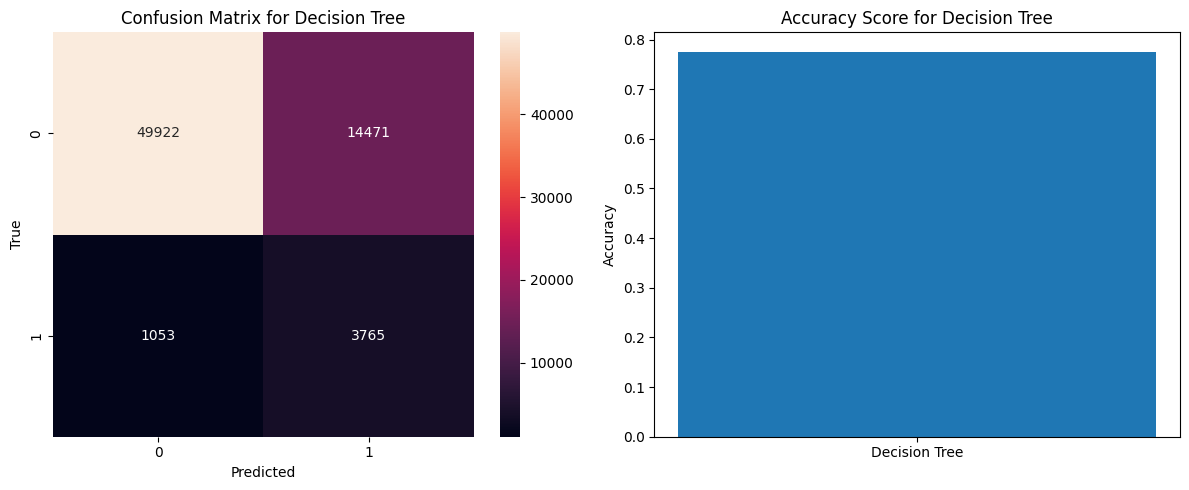

In [20]:
# For Decision Tree
plot_model_results(dt, X_test, y_test, 'Decision Tree')

AdaBoost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Creating the AdaBoost classifier
ab = AdaBoostClassifier(random_state=42)

# Fitting the classifier to the resampled training data
ab.fit(X_resampled, y_resampled)

# Making predictions
y_pred_ab = ab.predict(X_test)

# Calculating accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'Accuracy for AdaBoost Classifier: {accuracy_ab:.4f}')

# Calculating precision
precision_ab = precision_score(y_test, y_pred_ab)
print(f'Precision for AdaBoost Classifier: {precision_ab:.4f}')

# Calculating recall
recall_ab = recall_score(y_test, y_pred_ab)
print(f'Recall for AdaBoost Classifier: {recall_ab:.4f}')

# Calculating F1 score
f1_ab = f1_score(y_test, y_pred_ab)
print(f'F1 Score for AdaBoost Classifier: {f1_ab:.4f}')

# Calculating ROC-AUC score
roc_ab = roc_auc_score(y_test, y_pred_ab)
print(f'ROC-AUC Score for AdaBoost Classifier: {roc_ab:.4f}')


Accuracy for AdaBoost Classifier: 0.8886
Precision for AdaBoost Classifier: 0.3607
Recall for AdaBoost Classifier: 0.7773
F1 Score for AdaBoost Classifier: 0.4927
ROC-AUC Score for AdaBoost Classifier: 0.8371


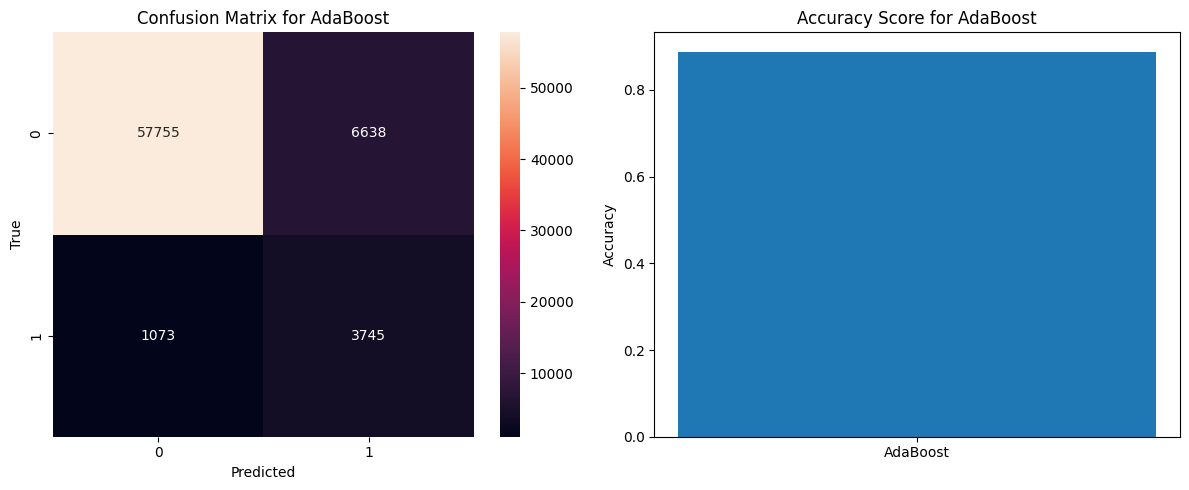

In [22]:

# For AdaBoost
plot_model_results(ab, X_test, y_test, 'AdaBoost')

K-Nearest Neighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN classifier
knn = KNeighborsClassifier()

# Fitting the classifier to the resampled training data
knn.fit(X_resampled, y_resampled)

# Making predictions
y_pred_knn = knn.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN Classifier: {accuracy_knn:.4f}')

# Calculating precision
precision_knn = precision_score(y_test, y_pred_knn)
print(f'Precision for KNN Classifier: {precision_knn:.4f}')

# Calculating recall
recall_knn = recall_score(y_test, y_pred_knn)
print(f'Recall for KNN Classifier: {recall_knn:.4f}')

# Calculating F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f'F1 Score for KNN Classifier: {f1_knn:.4f}')

# Calculating ROC-AUC score
roc_knn = roc_auc_score(y_test, y_pred_knn)
print(f'ROC-AUC Score for KNN Classifier: {roc_knn:.4f}')


Accuracy for KNN Classifier: 0.7605
Precision for KNN Classifier: 0.1725
Recall for KNN Classifier: 0.6424
F1 Score for KNN Classifier: 0.2719
ROC-AUC Score for KNN Classifier: 0.7059


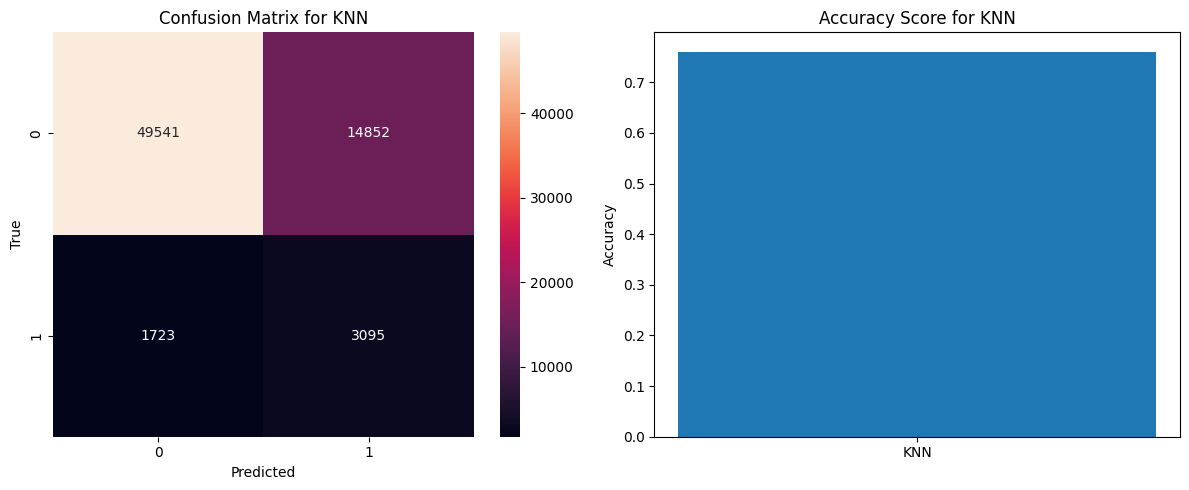

In [24]:
# For KNN
plot_model_results(knn, X_test, y_test, 'KNN')

XGBoost Classifier

In [25]:
import xgboost as xgb

# Creating the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fitting the classifier to the resampled training data
xgb_clf.fit(X_resampled, y_resampled)

# Making predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy for XGBoost Classifier: {accuracy_xgb:.4f}')

# Calculating precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f'Precision for XGBoost Classifier: {precision_xgb:.4f}')

# Calculating recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'Recall for XGBoost Classifier: {recall_xgb:.4f}')

# Calculating F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'F1 Score for XGBoost Classifier: {f1_xgb:.4f}')

# Calculating ROC-AUC score
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f'ROC-AUC Score for XGBoost Classifier: {roc_xgb:.4f}')

Accuracy for XGBoost Classifier: 0.8703
Precision for XGBoost Classifier: 0.3259
Recall for XGBoost Classifier: 0.8086
F1 Score for XGBoost Classifier: 0.4646
ROC-AUC Score for XGBoost Classifier: 0.8418


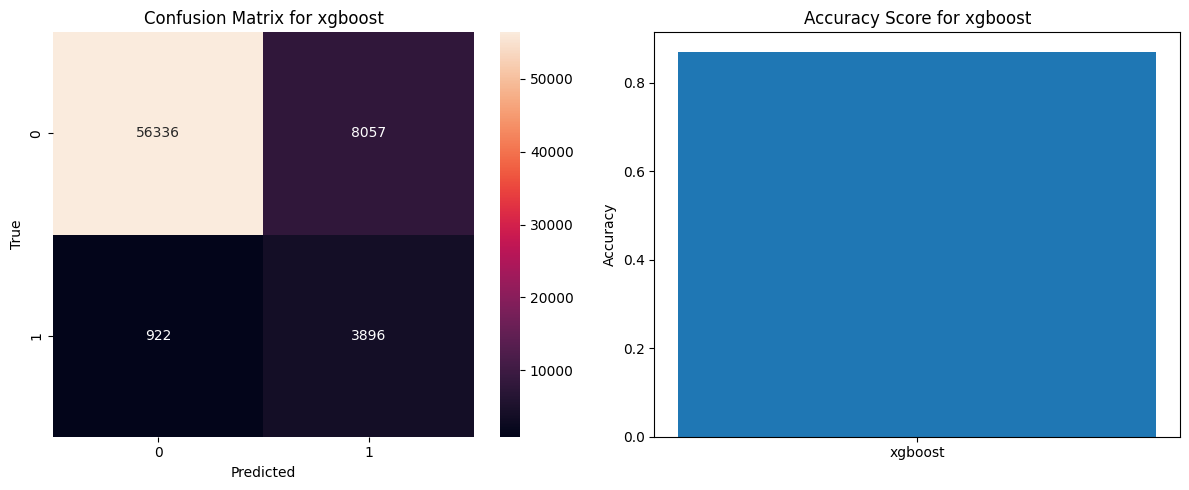

In [26]:
# For xgboost
plot_model_results(xgb_clf, X_test, y_test, 'xgboost')

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=0)
RF.fit(X_resampled, y_resampled)

y_pred_RF = RF.predict(X_test)

# Calculating accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'Accuracy for Random Forest Classifier with 10 Estimators: {accuracy_RF:.4f}')

# Calculating precision
precision_RF = precision_score(y_test, y_pred_RF)
print(f'Precision for Random Forest Classifier: {precision_RF:.4f}')

# Calculating recall
recall_RF = recall_score(y_test, y_pred_RF)
print(f'Recall for Random Forest Classifier: {recall_RF:.4f}')

# Calculating F1 score
f1_RF = f1_score(y_test, y_pred_RF)
print(f'F1 Score for Random Forest Classifier: {f1_RF:.4f}')

# Calculating ROC-AUC score
roc_RF = roc_auc_score(y_test, y_pred_RF)
print(f'ROC-AUC Score for Random Forest Classifier: {roc_RF:.4f}')

Accuracy for Random Forest Classifier with 10 Estimators: 0.8480
Precision for Random Forest Classifier: 0.2825
Recall for Random Forest Classifier: 0.7680
F1 Score for Random Forest Classifier: 0.4130
ROC-AUC Score for Random Forest Classifier: 0.8110


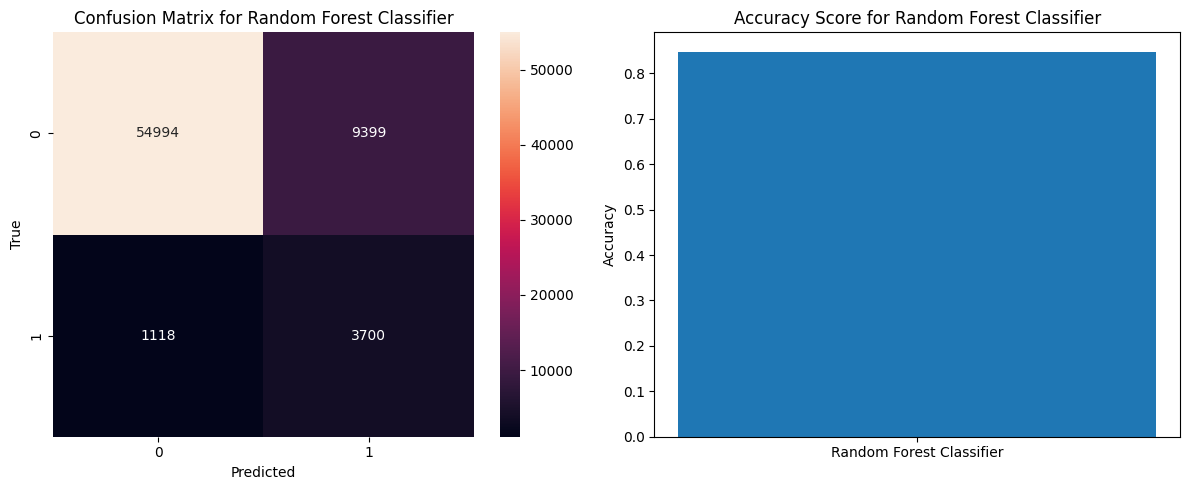

In [28]:
# For Decision Tree
plot_model_results(RF, X_test, y_test, 'Random Forest Classifier')